In [5]:

# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from numpy import asarray
from numpy import unique
from numpy import argmax
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [7]:
# load the dataset
dataset = loadtxt('Data/Dataset_xdot21.csv', delimiter=',')

In [9]:
# #ESSAI 3  -----OK
X = dataset[:,0:6]
y = dataset[:,6]
scalarX, scalarY = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,0.75))
scalarX.fit(X)
scalarY.fit(y.reshape(133,1)) 
X = scalarX.transform(X)
y=np.array(y).reshape(133,1) 
y = scalarY.transform(y) 

In [11]:
print(y)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

In [13]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=6, kernel_initializer='normal', activation='relu')) #kernel_initializer='normal'
model.add(Dense(1, kernel_initializer='normal', activation='linear')) #linear
print(model.summary())

H:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
model.compile(optimizer='adam', loss='mean_absolute_error')

In [17]:
# fit the keras model on the dataset
history = model.fit(X, y, epochs=100, batch_size=8, verbose=2, validation_split=0.25)

Epoch 1/100
13/13 - 1s - 41ms/step - loss: 0.0978 - val_loss: 0.7501
Epoch 2/100
13/13 - 0s - 3ms/step - loss: 0.0953 - val_loss: 0.7495
Epoch 3/100
13/13 - 0s - 3ms/step - loss: 0.0951 - val_loss: 0.7501
Epoch 4/100
13/13 - 0s - 3ms/step - loss: 0.0949 - val_loss: 0.7496
Epoch 5/100
13/13 - 0s - 3ms/step - loss: 0.0949 - val_loss: 0.7496
Epoch 6/100
13/13 - 0s - 3ms/step - loss: 0.0949 - val_loss: 0.7493
Epoch 7/100
13/13 - 0s - 3ms/step - loss: 0.0949 - val_loss: 0.7492
Epoch 8/100
13/13 - 0s - 3ms/step - loss: 0.0948 - val_loss: 0.7489
Epoch 9/100
13/13 - 0s - 3ms/step - loss: 0.0947 - val_loss: 0.7469
Epoch 10/100
13/13 - 0s - 3ms/step - loss: 0.0947 - val_loss: 0.7467
Epoch 11/100
13/13 - 0s - 3ms/step - loss: 0.0945 - val_loss: 0.7477
Epoch 12/100
13/13 - 0s - 3ms/step - loss: 0.0945 - val_loss: 0.7465
Epoch 13/100
13/13 - 0s - 3ms/step - loss: 0.0945 - val_loss: 0.7453
Epoch 14/100
13/13 - 0s - 3ms/step - loss: 0.0944 - val_loss: 0.7462
Epoch 15/100
13/13 - 0s - 3ms/step - loss:

In [18]:
# evaluate on test set
yhat = model.predict(X)
error = mean_absolute_error(y, yhat)
print('MAE: %.5f' % error)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MAE: 0.09767


In [21]:
print(yhat) 

[[-2.78289081e-04]
 [-3.98990000e-04]
 [-3.37593956e-04]
 [-4.05335799e-04]
 [-2.96597602e-04]
 [-3.62993916e-04]
 [-2.86926515e-04]
 [-6.06518355e-04]
 [-6.06104732e-04]
 [-4.59668227e-04]
 [-5.97294187e-04]
 [-4.57932008e-04]
 [-7.48066348e-04]
 [-6.63720304e-04]
 [-4.67212521e-04]
 [-5.07488498e-04]
 [-4.46535298e-04]
 [-1.19354809e-04]
 [-1.15707400e-04]
 [-1.61209493e-04]
 [-8.43416550e-04]
 [-5.25716692e-04]
 [-2.89229676e-04]
 [-8.44891183e-05]
 [-5.32681588e-04]
 [ 1.69139355e-04]
 [ 1.31362118e-04]
 [ 4.68385406e-06]
 [ 1.27462903e-04]
 [ 2.32188031e-05]
 [-3.58478690e-04]
 [-1.88919366e-04]
 [-2.31887214e-04]
 [ 1.61579112e-04]
 [-1.09067187e-05]
 [-1.72194792e-04]
 [-1.70679297e-04]
 [-6.65832194e-05]
 [-2.68367119e-04]
 [-2.54441053e-04]
 [ 5.56441955e-05]
 [ 1.32537098e-04]
 [ 1.14697730e-04]
 [-1.55188609e-04]
 [-1.28399581e-04]
 [-1.07251690e-04]
 [-3.14894482e-04]
 [-1.19261793e-04]
 [-1.05537474e-04]
 [-3.09258234e-04]
 [-2.41101487e-04]
 [-1.73029257e-05]
 [ 1.0378271

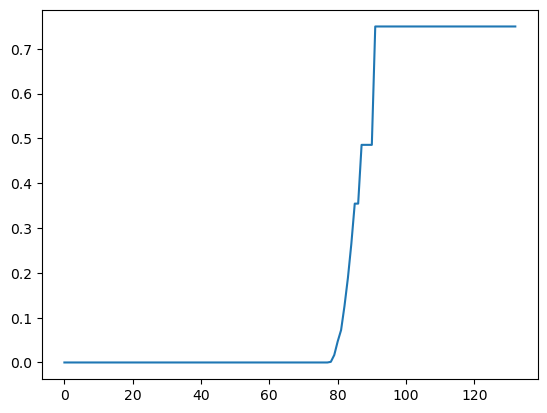

In [23]:
plt.plot(y)

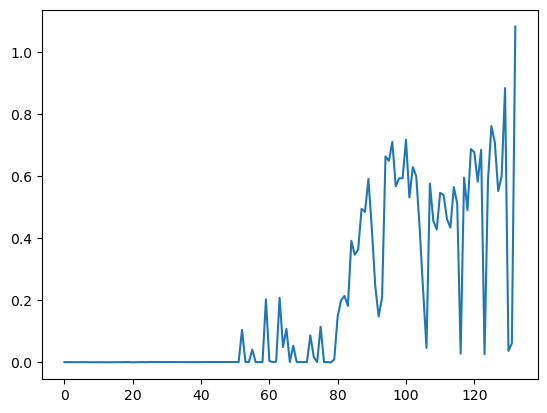

In [25]:
plt.plot(yhat)

In [27]:
print(yhat-y)

[[-2.78289081e-04]
 [-3.98990000e-04]
 [-3.37593956e-04]
 [-4.05335799e-04]
 [-2.96597602e-04]
 [-3.62993916e-04]
 [-2.86926515e-04]
 [-6.06518355e-04]
 [-6.06104732e-04]
 [-4.59668227e-04]
 [-5.97294187e-04]
 [-4.57932008e-04]
 [-7.48066348e-04]
 [-6.63720304e-04]
 [-4.67212521e-04]
 [-5.07488498e-04]
 [-4.46535298e-04]
 [-1.19354809e-04]
 [-1.15707400e-04]
 [-1.61209493e-04]
 [-8.43416550e-04]
 [-5.25716692e-04]
 [-2.89229676e-04]
 [-8.44891183e-05]
 [-5.32681588e-04]
 [ 1.69139355e-04]
 [ 1.31362118e-04]
 [ 4.68385406e-06]
 [ 1.27462903e-04]
 [ 2.32188031e-05]
 [-3.58478690e-04]
 [-1.88919366e-04]
 [-2.31887214e-04]
 [ 1.61579112e-04]
 [-1.09067187e-05]
 [-1.72194792e-04]
 [-1.70679297e-04]
 [-6.65832194e-05]
 [-2.68367119e-04]
 [-2.54441053e-04]
 [ 5.56441955e-05]
 [ 1.32537098e-04]
 [ 1.14697730e-04]
 [-1.55188609e-04]
 [-1.28399581e-04]
 [-1.07251690e-04]
 [-3.14894482e-04]
 [-1.19261793e-04]
 [-1.05537474e-04]
 [-3.09258234e-04]
 [-2.41101487e-04]
 [-1.73029257e-05]
 [ 1.0378271

In [29]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


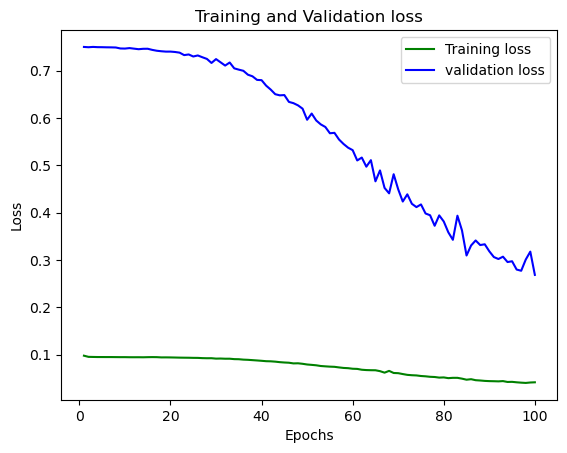

In [31]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()